In [0]:
import torchvision
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

In [0]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


In [0]:
from PIL import Image
import torchvision.transforms as T

In [0]:
def get_prediction(img_path, threshold):
  img = Image.open(img_path) # Load the image
  transform = T.Compose([T.ToTensor()]) # Defing PyTorch Transform
  img = transform(img) # Apply the transform to the image
  pred = model([img]) # Pass the image to the model
  print(pred[0])
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())] # Get the Prediction Score
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] # Bounding boxes
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] # Get list of index with score greater than threshold.
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_boxes, pred_class


In [0]:
import cv2
import matplotlib.pyplot as plt

In [0]:
def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):
  boxes, pred_cls = get_prediction(img_path, threshold) # Get predictions
  print(boxes)
  print(pred_cls)
  img = cv2.imread(img_path) # Read image with cv2
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
  for i in range(len(boxes)):
    cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) # Draw Rectangle with the coordinates
    cv2.putText(img,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) # Write the prediction class
  plt.figure() # display the output image
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.savefig('image.jpg')


In [0]:
!wget https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/10best-cars-group-cropped-1542126037.jpg -O car.jpg

--2020-05-19 21:44:02--  https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/10best-cars-group-cropped-1542126037.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2178423 (2.1M) [image/jpeg]
Saving to: ‘car.jpg’

car.jpg             100%[===================>]   2.08M  --.-KB/s    in 0.09s   

2020-05-19 21:44:03 (23.5 MB/s) - ‘car.jpg’ saved [2178423/2178423]



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


{'boxes': tensor([[ 78.4109,  54.5107,  83.4136,  61.9272],
        [ 77.8157,  54.0683,  86.3074,  63.0454],
        [222.7350, 198.7030, 255.3082, 222.2989],
        [ 58.6507,   0.0000, 232.8670, 156.5296],
        [ 25.2622, 108.3393, 255.4037, 214.3398],
        [ 87.4793, 166.6736, 108.5012, 175.6787],
        [ 83.5679, 163.8918, 114.2819, 178.1163],
        [ 82.0087, 113.8136, 248.9673, 200.2569],
        [111.1124, 210.9924, 245.6342, 254.8127],
        [112.6328,  31.0512, 141.7852,  74.0394],
        [139.1551, 227.3921, 175.7551, 247.8831],
        [ 36.0819, 161.5295,  84.1373, 197.8801],
        [ 71.9387,   5.9486, 102.8461, 120.2710],
        [  4.3310,  42.2203, 256.0000, 242.4967],
        [ 72.6421,   9.7371, 126.3288, 135.8669],
        [ 97.9901, 114.2037, 249.9128, 193.7832],
        [ 68.8136, 156.0058, 105.5116, 173.1807],
        [ 14.2892,   6.9802, 246.2597, 216.0197]], grad_fn=<StackBackward>), 'labels': tensor([37, 37, 77, 85, 76,  3,  3, 75, 81, 85,  3,  

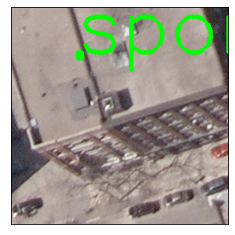

In [0]:
object_detection_api('./Toronto_03553.0.0.jpg')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


{'boxes': tensor([[2217.7842, 1025.8782, 3132.8147, 1468.7490],
        [1630.0000,  737.7410, 1881.4874,  857.3323],
        [1094.5420,  830.5576, 1614.6750, 1058.2268],
        [1938.6216,  820.2023, 2420.1748, 1053.7822],
        [ 499.1779, 1078.2030, 1259.7959, 1534.7053],
        [ 347.1485,  824.3181,  954.9515, 1028.9930],
        [2474.7898,  826.7632, 3108.8977, 1033.9982],
        [2168.4397,  724.5837, 2540.2175,  845.3445],
        [ 960.5629,  735.2333, 1322.9053,  849.7733],
        [1406.7609, 1043.1063, 2051.3325, 1662.0839],
        [ 507.6239,  453.1949,  590.8086,  528.3117],
        [ 664.2277,  847.1919,  718.2243,  898.6283],
        [ 719.1929,  855.1429,  749.5078,  892.3683],
        [ 510.0830,  454.4293,  586.1918,  525.3127],
        [1347.0775,  864.3512, 1396.1024,  903.0595],
        [2158.0166,  728.1453, 2555.0552,  849.6918],
        [2627.2466, 1081.2104, 2730.7144, 1166.0277],
        [ 683.3459,  854.8659,  725.1792,  897.0065],
        [ 619.0202

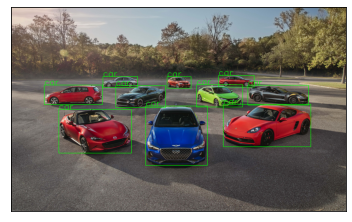

In [0]:
object_detection_api('./car.jpg')